In [24]:
import numpy as np
import torch 
import torch.nn as nn
import torch.optim as optim
import pandas as pd 
import re 
from nltk.corpus import stopwords

In [37]:
df = pd.read_csv('/Users/Moon/nlp-tutorial/tripadvisor_hotel_reviews.csv')
df = df.sample(n = 2000)

In [38]:
print(df.isnull().sum())

Review    0
Rating    0
dtype: int64


In [39]:
def replace_col(row):
    if row['Rating'] >= 4:
        return 1
    else:
        return 0
    

In [40]:
def preprocessing(data):
    only = []
    for i in data:
        only.append(re.sub('[^a-zA-Z]', ' ', i))
    
    stops = set(stopwords.words('english'))
    inputs = [word for word in only if not word in stops]
    
    return inputs

In [119]:
data = preprocessing(df['Review'])

In [120]:
b = []
for i in data:
    b.append(len(i))

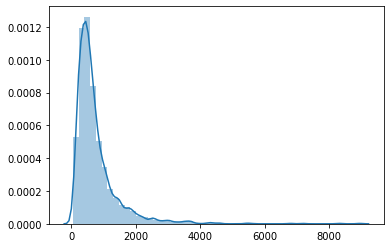

In [114]:
import seaborn as sns
sns.distplot(b)

In [44]:
b = pd.Series(b)
b.describe()

count    2000.000000
mean      752.282000
std       709.336299
min        44.000000
25%       355.000000
50%       553.000000
75%       882.500000
max      8953.000000
dtype: float64

In [121]:
c = pd.Series(b).describe()

In [123]:
g = c['75%']

In [125]:
g

882.5

In [126]:
X = []
for sen in data:
        word = sen.split()
        
        input_x = [word_dict[n] for n in word]
        X.append(input_x[:int(g)])

In [139]:
len(data[0])

591

In [140]:
len(x[0])

591

In [46]:
x = [i for i in data]
word_list = ' '.join(x).split()
word_list = list(set(word_list))

word_dict = {w : i for i, w in enumerate(word_list)}
vocab_size = len(word_dict)


In [48]:
max_len = 865

def batch():
    X = []
    y = []
    
    for sen in data:
        word = sen.split()
        
        input_x = [word_dict[n] for n in word]
        X.append(input_x[:max_len])
        
    for item in X:
        while len(item) < max_len:
            item.append(0)
            
    df['Rating'] = df.apply(replace_col, axis=1)
    y = [i for i in df['Rating']]
    
    return X, y



In [143]:
hidden = 3
embedding_size = 5
C = nn.Embedding(vocab_size, embedding_size)
lstm = nn.LSTM(input_size = embedding_size, hidden_size = hidden)
W = nn.Linear(max_len * hidden, 1)

In [70]:
vocab_size

15733

In [128]:
X,y = batch()

In [129]:
X = torch.LongTensor(X)
y = torch.FloatTensor(y)

In [142]:
X.shape

torch.Size([2000, 865])

In [145]:
C(X).shape

torch.Size([2000, 865, 5])

In [130]:
embed = C(X)
print(embed.shape)
print(embed)

torch.Size([2000, 865, 5])
tensor([[[-0.1518,  0.4102,  1.2189,  0.5971,  1.0731],
         [ 0.5422,  0.2817, -0.6056, -0.2148,  1.1948],
         [ 0.9009, -0.4935,  0.5362, -0.8777,  1.1994],
         ...,
         [-1.3088, -1.0276,  1.4321, -1.2416,  0.4897],
         [-1.3088, -1.0276,  1.4321, -1.2416,  0.4897],
         [-1.3088, -1.0276,  1.4321, -1.2416,  0.4897]],

        [[-0.1322,  0.9824,  0.8256, -0.7044, -0.0145],
         [-0.7264, -0.5828,  3.0731,  1.2070, -1.8740],
         [-0.6499,  0.3731,  1.6882, -1.1739,  0.5164],
         ...,
         [-1.3088, -1.0276,  1.4321, -1.2416,  0.4897],
         [-1.3088, -1.0276,  1.4321, -1.2416,  0.4897],
         [-1.3088, -1.0276,  1.4321, -1.2416,  0.4897]],

        [[-0.9630, -0.2514, -0.2194,  0.4585, -1.5870],
         [ 1.2738, -0.2600,  0.4037, -1.4024,  1.5165],
         [ 1.1368, -0.8397,  0.1296, -0.6294, -1.1588],
         ...,
         [-1.3088, -1.0276,  1.4321, -1.2416,  0.4897],
         [-1.3088, -1.0276,  1.

In [131]:
print(embed.shape)
print(embed)

torch.Size([2000, 865, 5])
tensor([[[-0.1518,  0.4102,  1.2189,  0.5971,  1.0731],
         [ 0.5422,  0.2817, -0.6056, -0.2148,  1.1948],
         [ 0.9009, -0.4935,  0.5362, -0.8777,  1.1994],
         ...,
         [-1.3088, -1.0276,  1.4321, -1.2416,  0.4897],
         [-1.3088, -1.0276,  1.4321, -1.2416,  0.4897],
         [-1.3088, -1.0276,  1.4321, -1.2416,  0.4897]],

        [[-0.1322,  0.9824,  0.8256, -0.7044, -0.0145],
         [-0.7264, -0.5828,  3.0731,  1.2070, -1.8740],
         [-0.6499,  0.3731,  1.6882, -1.1739,  0.5164],
         ...,
         [-1.3088, -1.0276,  1.4321, -1.2416,  0.4897],
         [-1.3088, -1.0276,  1.4321, -1.2416,  0.4897],
         [-1.3088, -1.0276,  1.4321, -1.2416,  0.4897]],

        [[-0.9630, -0.2514, -0.2194,  0.4585, -1.5870],
         [ 1.2738, -0.2600,  0.4037, -1.4024,  1.5165],
         [ 1.1368, -0.8397,  0.1296, -0.6294, -1.1588],
         ...,
         [-1.3088, -1.0276,  1.4321, -1.2416,  0.4897],
         [-1.3088, -1.0276,  1.

In [132]:
o, (_,_) = lstm(embed)

In [133]:
print(o.shape)
print(o)

torch.Size([2000, 865, 3])
tensor([[[ 0.0717, -0.0390,  0.0749],
         [ 0.0556,  0.0183,  0.0858],
         [ 0.0619, -0.0957,  0.1083],
         ...,
         [ 0.0075, -0.1229,  0.0327],
         [ 0.0075, -0.1229,  0.0327],
         [ 0.0075, -0.1229,  0.0327]],

        [[ 0.1924,  0.0521,  0.0544],
         [ 0.1251, -0.1549,  0.0499],
         [ 0.1243, -0.0440,  0.0756],
         ...,
         [ 0.0091, -0.1635,  0.0368],
         [ 0.0091, -0.1635,  0.0368],
         [ 0.0091, -0.1635,  0.0368]],

        [[ 0.0751,  0.0192, -0.0432],
         [ 0.0952, -0.1411,  0.1182],
         [ 0.1279, -0.0901,  0.1184],
         ...,
         [ 0.0094, -0.1778,  0.0365],
         [ 0.0094, -0.1778,  0.0365],
         [ 0.0094, -0.1778,  0.0365]],

        ...,

        [[ 0.1698, -0.0595,  0.1297],
         [ 0.0604, -0.1325,  0.0245],
         [ 0.0319,  0.0542, -0.0089],
         ...,
         [ 0.0093, -0.1864,  0.0353],
         [ 0.0093, -0.1864,  0.0353],
         [ 0.0093, -0.1

In [135]:
c = o.view(-1, max_len*3)
c.shape

torch.Size([2000, 2595])

In [93]:
a = o.view(-1, 865*3)
print(a.shape)

torch.Size([2000, 2595])


In [106]:
y_hat = W(a)
print(y_hat.shape)
print(y.shape)
y_hat = y_hat.squeeze()

torch.Size([2000, 1])
torch.Size([2000])


In [99]:
criterion = nn.BCEWithLogitsLoss()


In [107]:
criterion(y_hat, y)

tensor(0.6728, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)